# Run Spectractor from notebooks

- adapted from https://github.com/stubbslab/PCWG-AuxTel/blob/main/Run_Spectractor_example.ipynb

- author : Sylvie Dagoret-campagne
- affiliation : IJCLab/IN2P3/CNRS
- update : September 2021 13th
- DM-Stack version : **w_2021_36**
- Big CPU

In [1]:
# wide scan : HD 160617 
all_myseq_holo=range(234,310)
# narrow scan :  HD 160617 
#all_myseq_holo=range(317,365)
all_myseq=all_myseq_holo

ExpoNum=317

In [2]:
#Check your stack container version matches the setup instructions!
version = ! eups list -s lsst_distrib
print(f'You are running {version[0].split()[1]} of lsst_distrib')

You are running current of lsst_distrib


Check your packages are setup, as per the setup instructions. Each of the ones setup should appear here. If they don't, you've missed the line in your .user_setups file

In [3]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/dagoret/repos/atmospec 	setup
daf_butler            LOCAL:/home/dagoret/repos/daf_butler 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/eups 	setup
rapid_analysis        LOCAL:/home/dagoret/repos/rapid_analysis 	setup


Redirect the logger outputs (stack and Spectractor) to the notebook:

In [4]:
from lsst.log.utils import enable_notebook_logging
enable_notebook_logging()

Make a bulter, pick an image, and make a data reference to it:

In [5]:
import lsst.daf.persistence as dafPersist

#After mfl created /project/shared/auxTel/rerun/dagoret (2021/09/09):
#repoDir='/project/shared/auxTel/rerun/dagoret/output'
#repoDir='/project/shared/auxTel/rerun/dagoret'
repoDir='/project/shared/auxTel/rerun/dagoret/outputspectr_scan2021_July'
butler=  dafPersist.Butler(repoDir)

dataId = {'dayObs': '2021-07-07', 'seqNum': ExpoNum}
# good
#dataId = {'dayObs': '2021-07-07', 'seqNum': 330}
dataRef = butler.dataRef('raw', **dataId)

<ipython-input-5-63d98d0dcedf>:7: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler=  dafPersist.Butler(repoDir)
<ipython-input-5-63d98d0dcedf>:7: FutureWarning: Gen2 Butler has been deprecated (LatissMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler=  dafPersist.Butler(repoDir)
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading exposure registry from /lsstdata/offline/instrument/LATISS/gen2repo/registry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3


In [6]:
type(dataId)

dict

Instantiate the task, set our config options

In [7]:
from lsst.atmospec import ProcessStarTask

config = ProcessStarTask.ConfigClass()
config.doDisplayPlots = True  # show the plots in the notebook
config.spectractorDebugMode = True  # make all the debug plots along the way
config.binning = 4

# pretty minimal ISR because some things we don't have the calib products available for
# most of this would be picked up automatically if running from the command line from config files
config.isr.doLinearize = False
config.isr.doDark = False
config.isr.doFlat = False
config.isr.doFringe = False
config.isr.doDefect = True
config.isr.doCrosstalk = False
config.isr.doSaturationInterpolation = False

task = ProcessStarTask(config=config)

Set this so that the plots pop up in the notebook

In [8]:
%matplotlib inline

Run, and watch the debug plots roll in. If you've selected a writable rerun above, the result will also be butler.put() in there so you can butler.get() it later, but we can also catch the result as it's returned by the runDataRef() method

Ignoring translator header fixup of LATISS AT_O_20210707_000317: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210707_000317: 'MJD-OBS not found'
Ignoring translator header fixup of LATISS AT_O_20210707_000317: 'MJD-OBS not found'
lsst.atmospec.spectraction WARN: Supplementary parameter already existed CALLING_CODE in parameters, use overrideParameters() to override already existing keys instead.
lsst.atmospec.spectraction INFO: Starting SPECTRACTOR


Loading config from /home/dagoret/repos/atmospec/config/auxtel.ini


2021-10-06 11:22:57,865 Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=0.7403912627918672 but average of self.read_out_noise is 1.0.


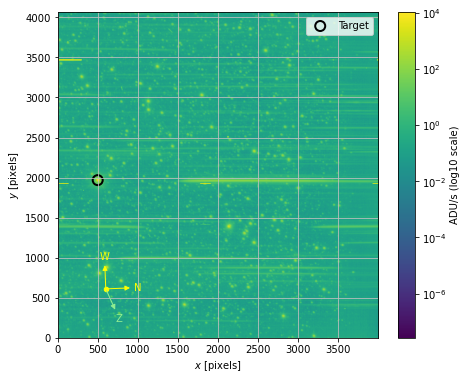

lsst.atmospec.spectraction INFO: Pixel value at centroid = 7914.76484375
lsst.atmospec.spectraction INFO: Rebinning image with rebin of 4


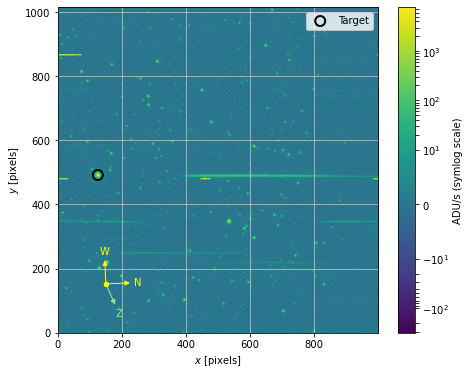

lsst.atmospec.spectraction INFO: Search for the target in the image...


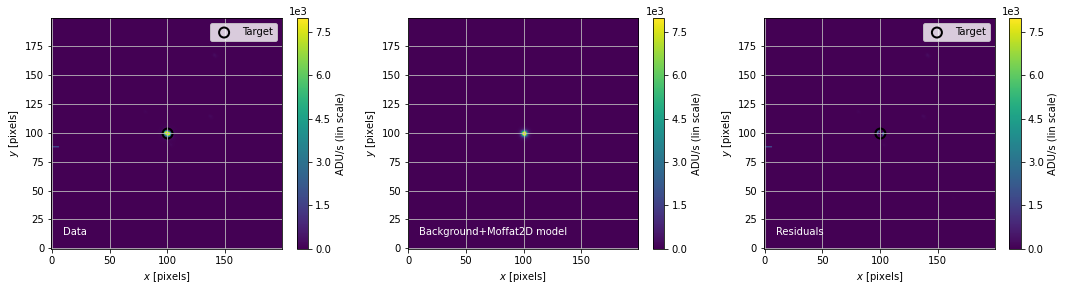

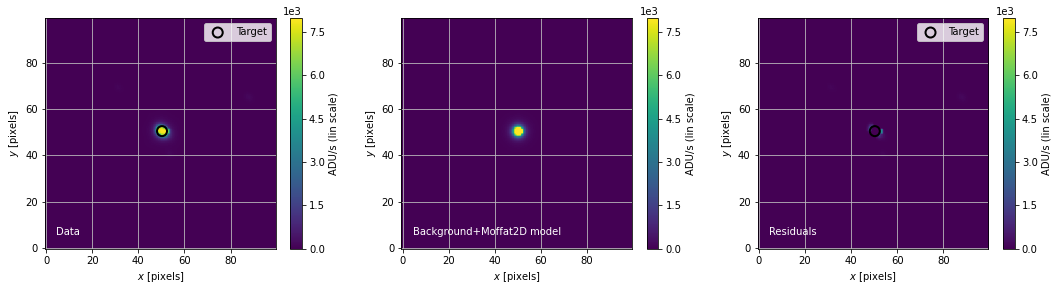

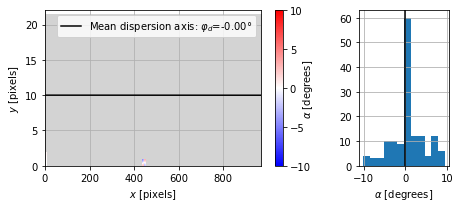

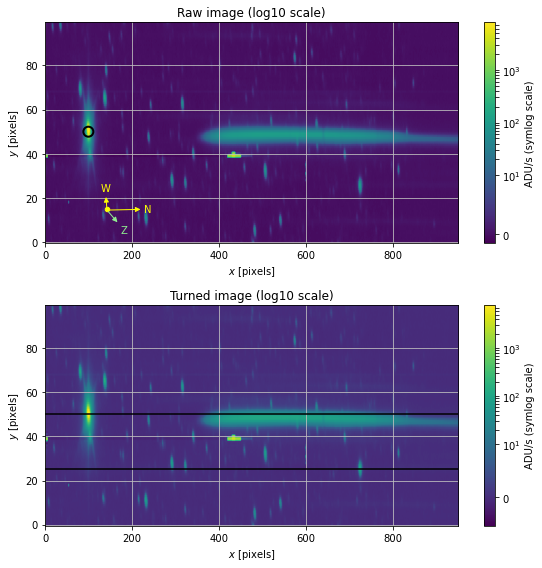

lsst.atmospec.spectraction INFO: Search for the target in the rotated image...


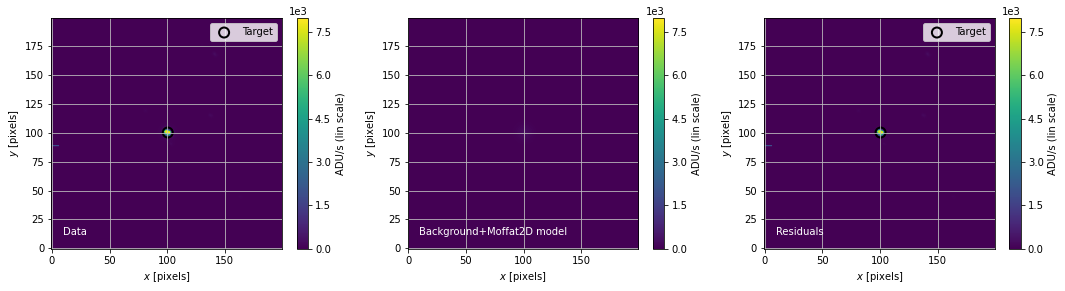

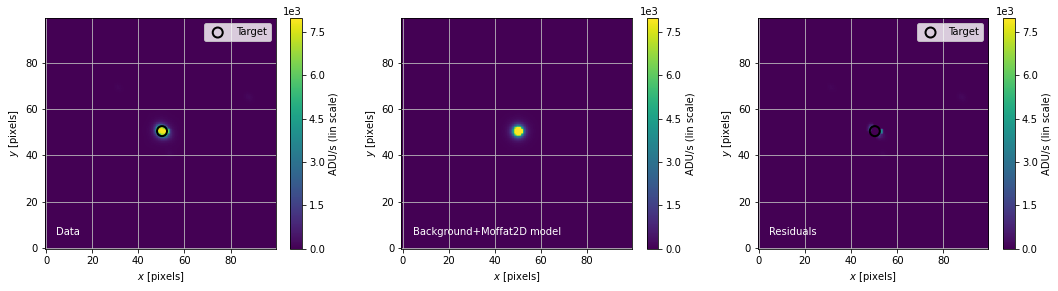

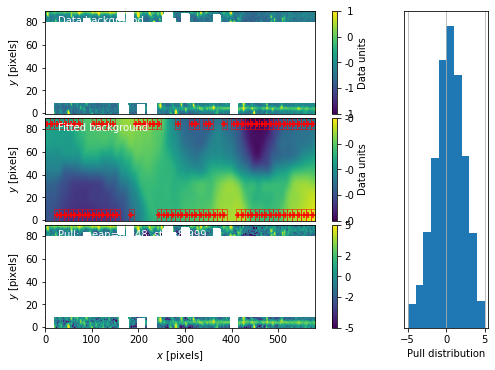

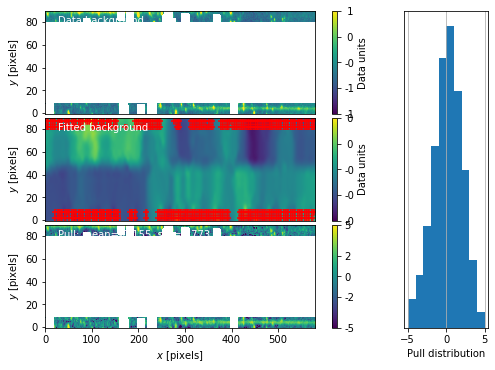

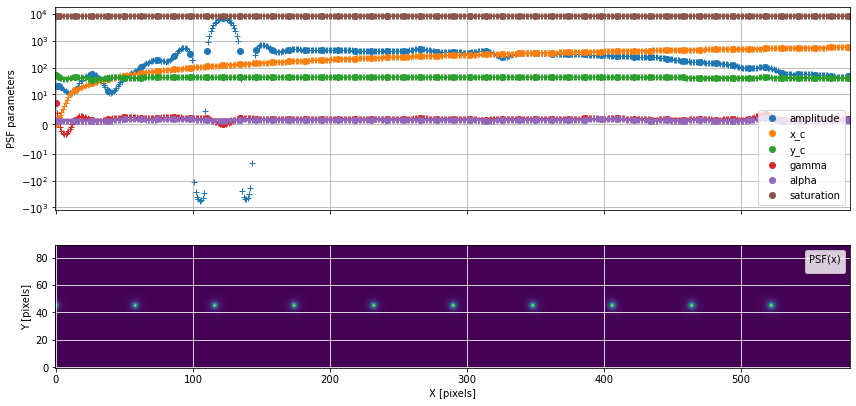

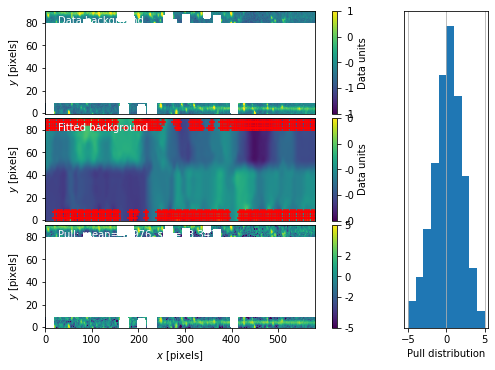

/home/dagoret/repos/Spectractor/spectractor/fit/fitter.py:1296: OptimizeWarning: Unknown solver options: gtol, maxls, maxcor
  result = optimize.minimize(nll, fit_workspace.p, method=minimizer_method,
2021-10-06 11:27:36,272 ChromaticPSF fit_chromatic_psf    WARNING 
	Trace of final covariance matrix (210.41955373105841) is below the trace of the prior covariance matrix (9337.34678308342). This is probably due to a very high regularisation parameter in case of a bad fit. Therefore the final covariance matrix is mulitiplied by the ratio of the traces and the amplitude parameters are very close the amplitude priors.


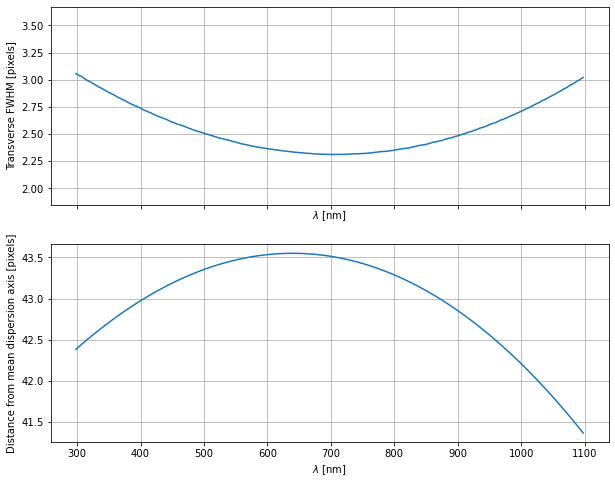

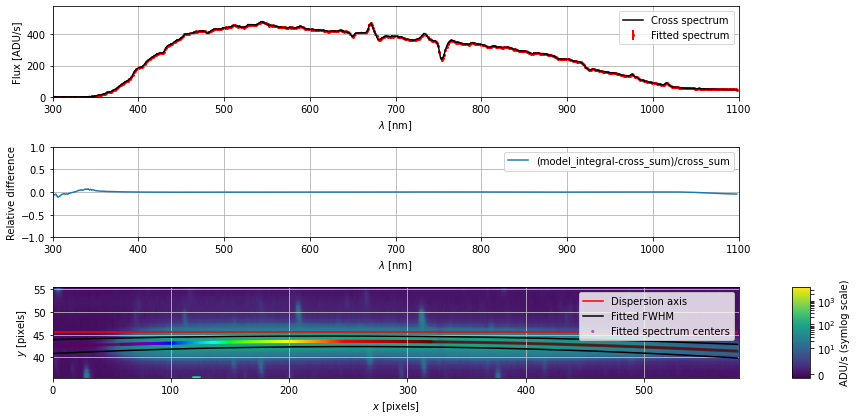

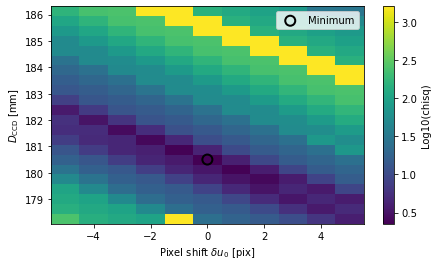

2021-10-06 11:27:50,562 Spectrum   convert_from_flam_to_ADUrate WARNING You ask to convert spectrum already in ADU/s in ADU/s... check your code ! Skip the instruction


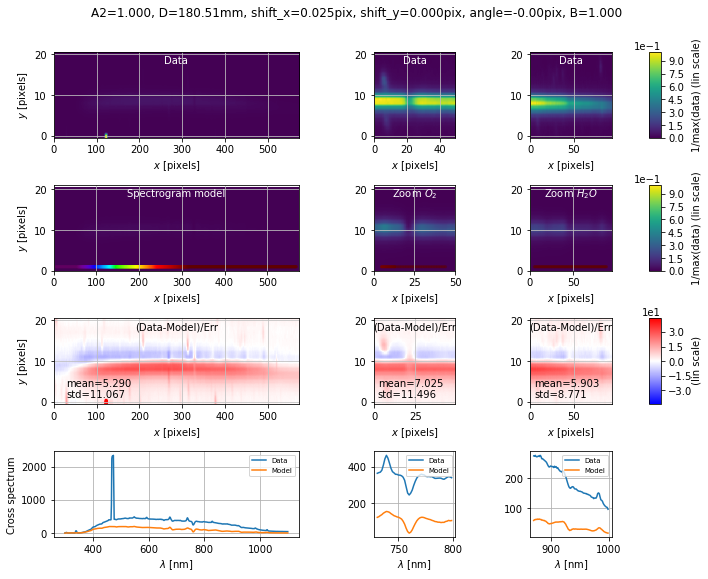

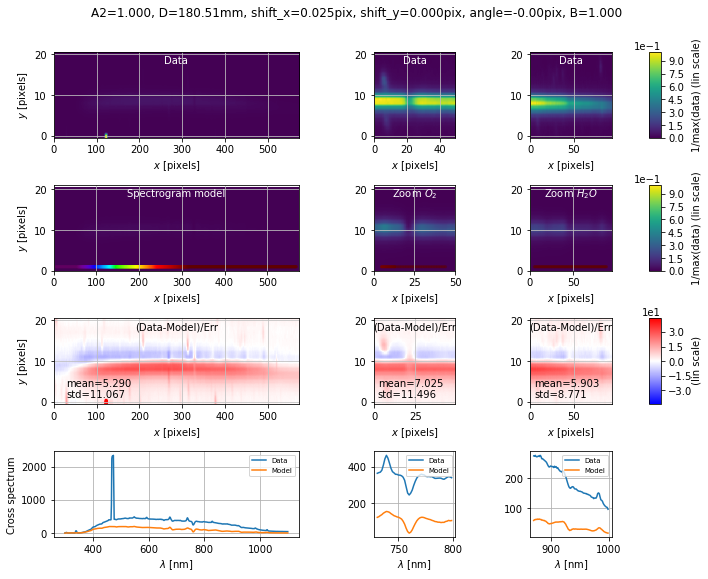

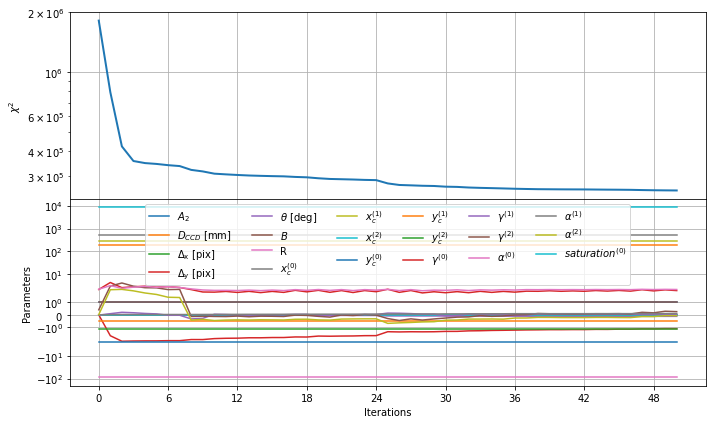

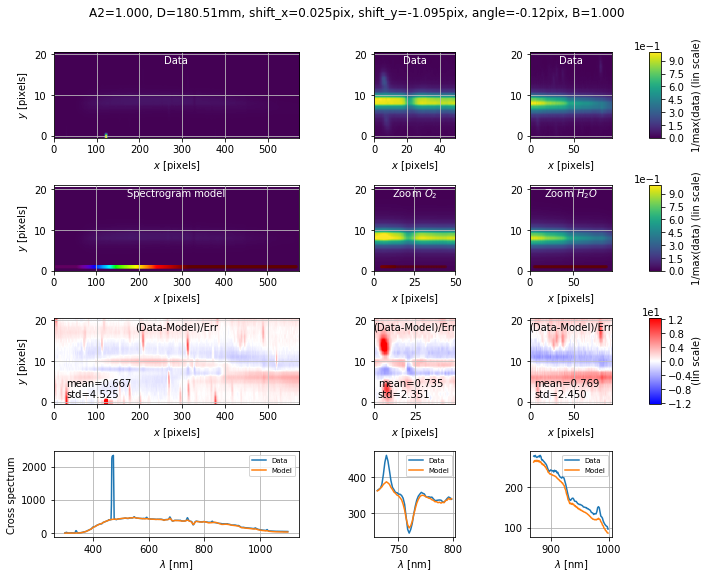

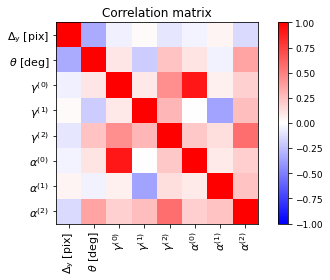

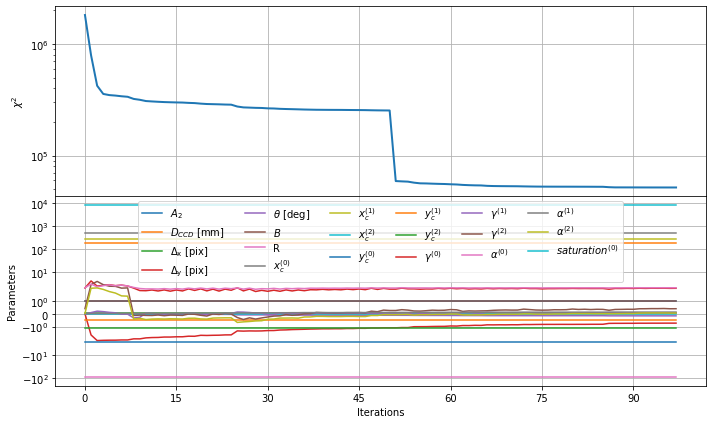

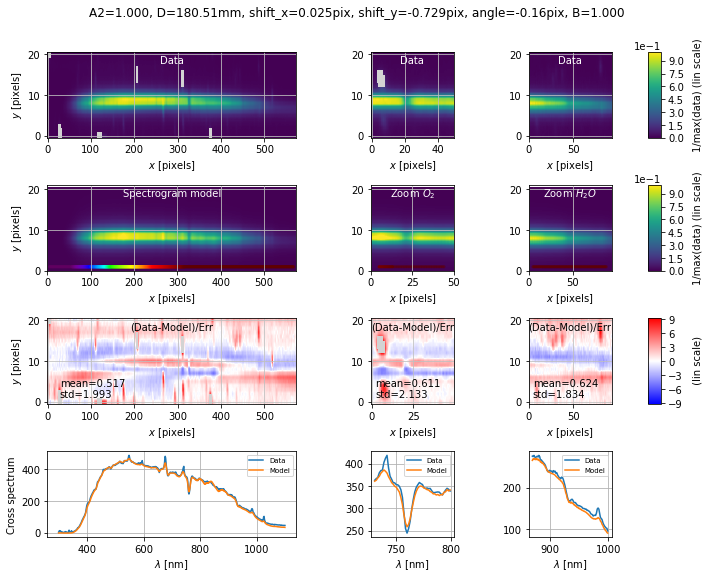

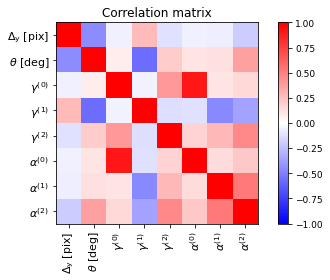

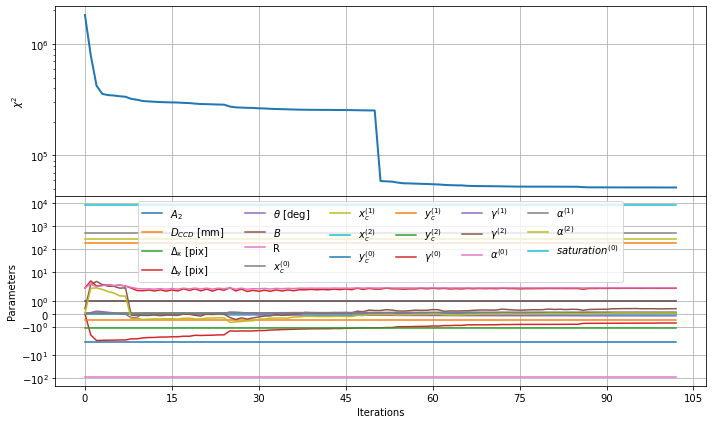

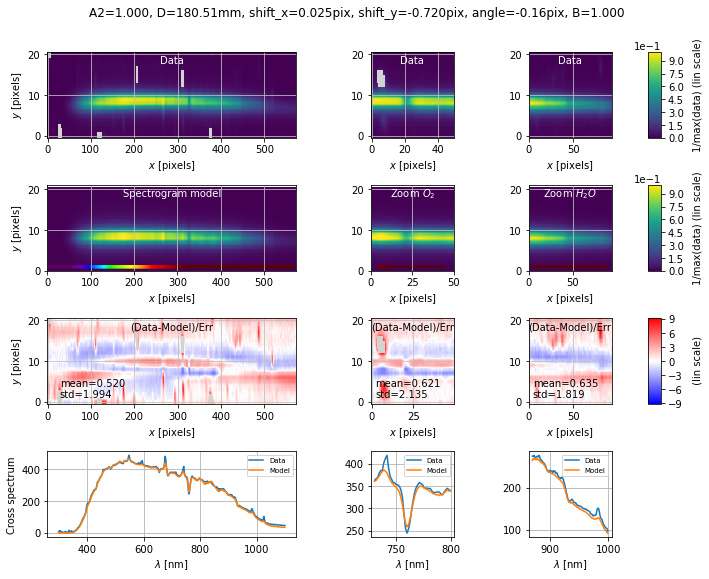

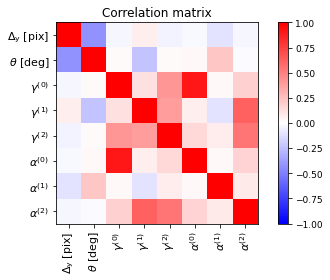

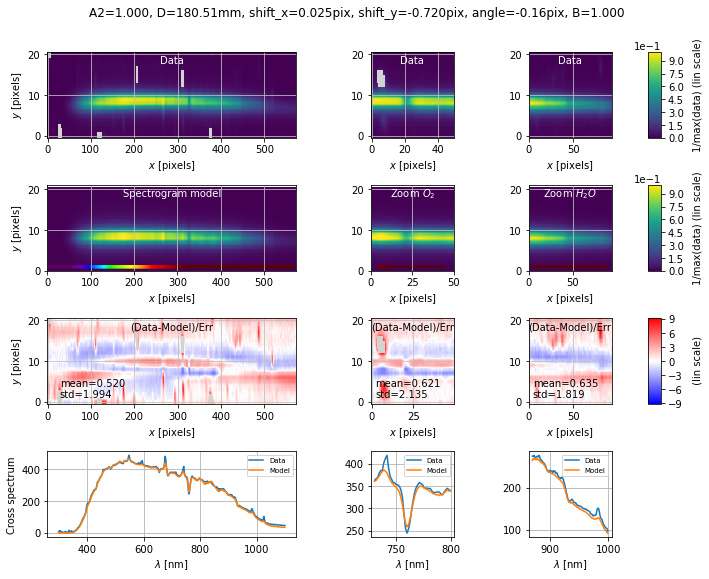

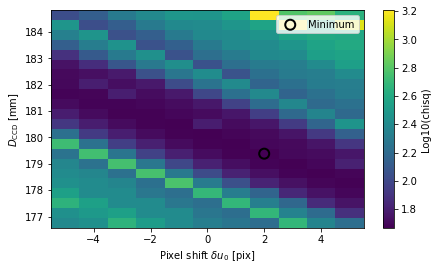

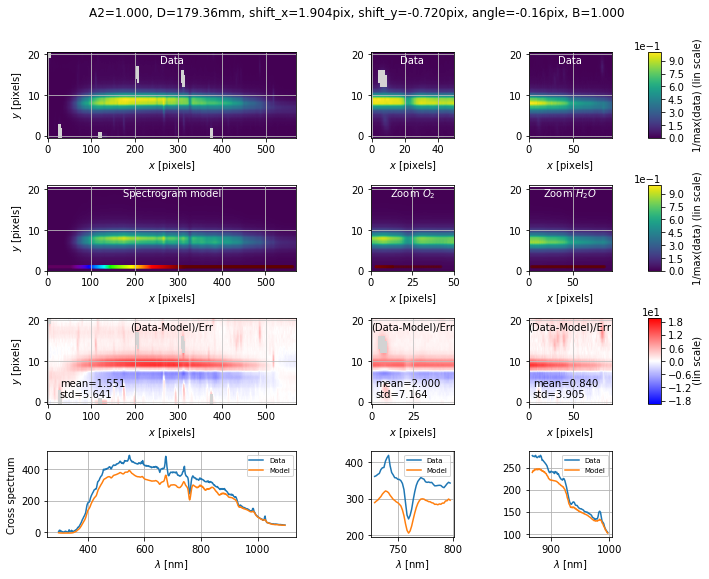

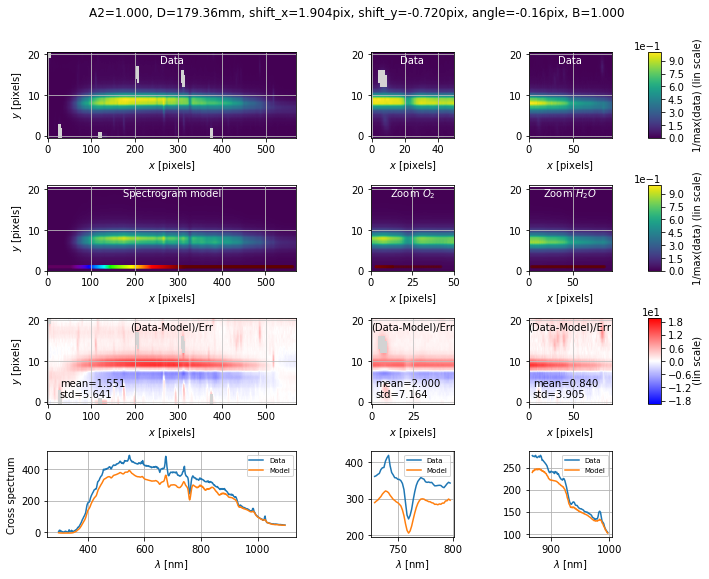

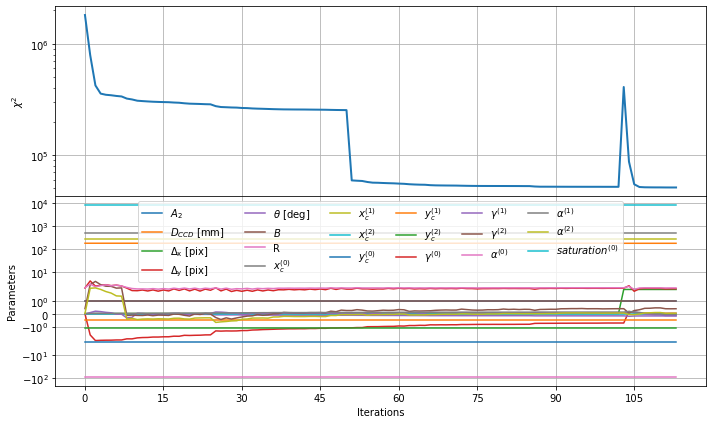

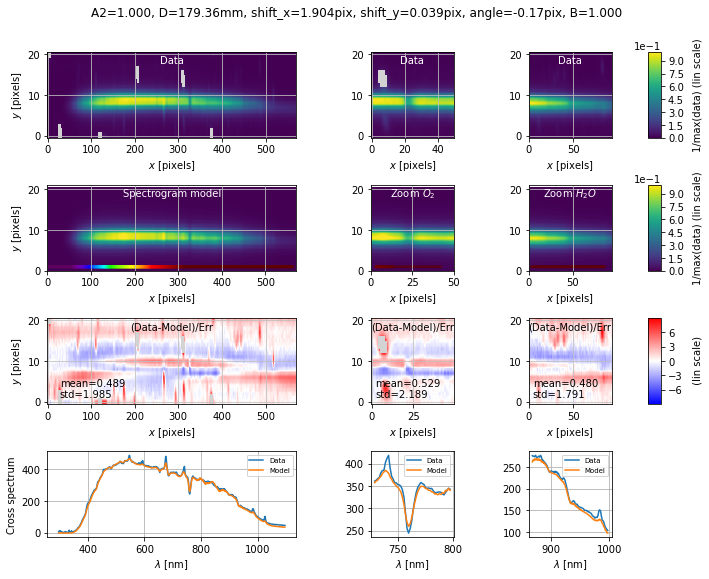

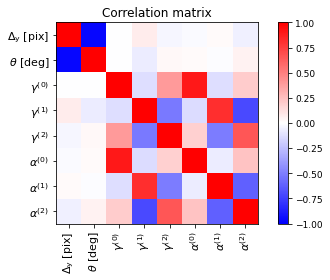

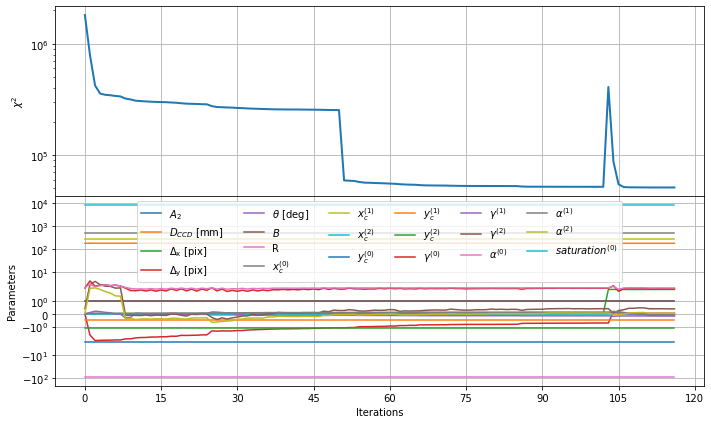

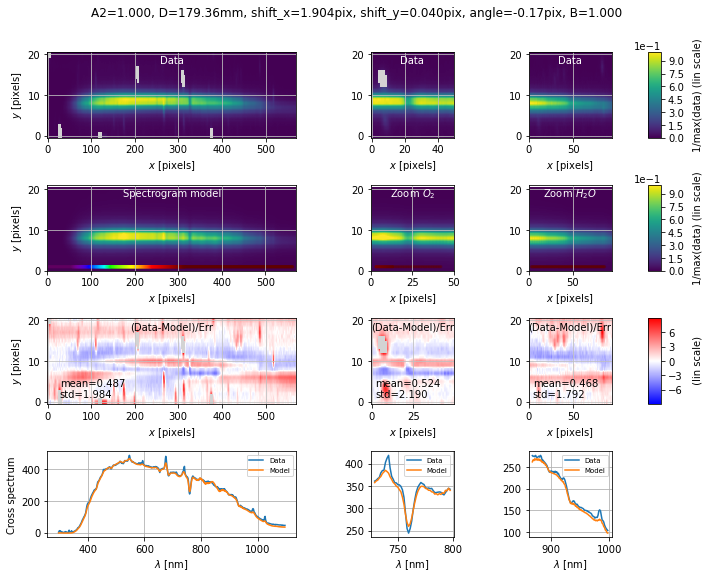

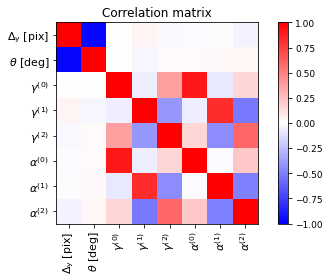

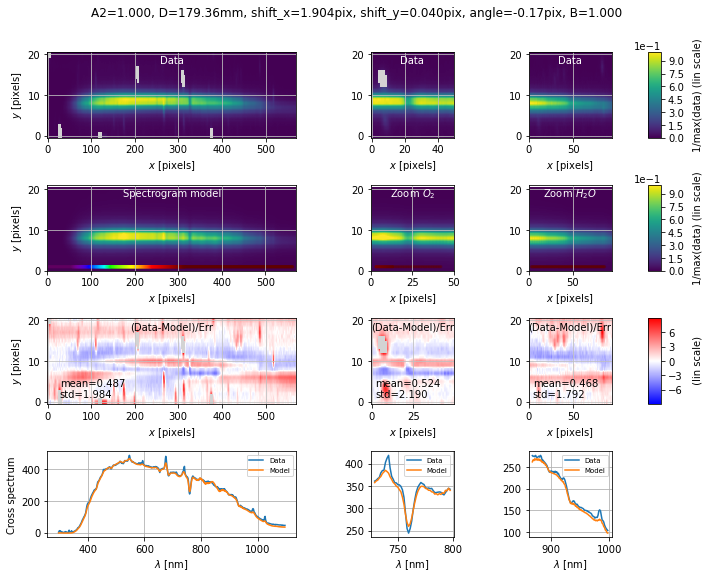

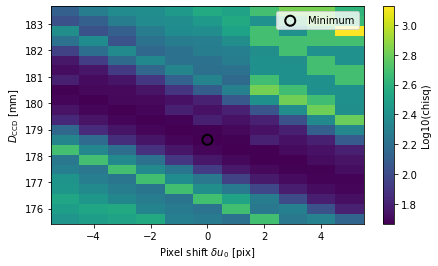

In [9]:
result = task.runDataRef(dataRef)

In [10]:
print("hello")

hello


In [11]:
print(result)